(500, 1)


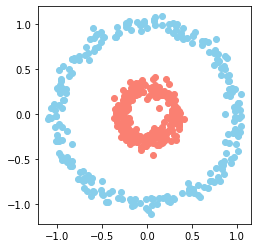

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# cargamos el dataset de clasificacion que sera el problema que resolveran las redes
n = 500 
p = 2 

x, y = make_circles(n_samples=n , noise=.05, factor=0.3 )
y = y.reshape(500,1) 
print(y.shape)
plt.scatter(x[y[:,0]==0,1], x[y[:,0]==0,0], color="skyblue") 
plt.scatter(x[y[:,0]==1,1], x[y[:,0]==1,0], color="salmon")
plt.axis("scaled")
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()


# nivel 0 
en el notebook "4 creando una NN desde 0 para clasificar.ipynb" anterior implementamos una NN desde 0 solo usando python para el codigo y numpy para hacer las operaciones matematicas. 
aunqeu este nivel tiene mucho grado de dificultad al definir cada operacion es el nivel mas laxo para definir cualquier tipo de operacion o capa aunque no exista previamente lo podmeos crear. el problema es que si queremos manipular la arquitectura de la red (como agregar una skip connection) todo se vuelve muy complejo. 
aqui es donde pasamos al siguiente nivel. 



# nivel 1 (librerias de diferenciacion automatica) Tensor flow y pytorch
estas libreerias se encragran de calcular las derivadas parciales del coste respecto a los parametros de forma automatica de cualquier arquitectura planteada. para realizarlo, las librerias representan todas las operaciones de la arquitectura como un grafo, donde cada nodo puede representar una variable de entrada o una operacion a realizar. 
flujo de trabajo en tensorflow 
1. definir explicitamente que operaciones forman parte de nuestro grafo computacional, que va entrar, que operaciones se le van a relaizr y como va a salir. 
  - se usan placeholder para definir PUNTOS DONDE LE DAREMOS datos de entrada al grafo  

In [11]:
# import tensorflow as tf

# crearemos los puntos de entrada de nuestro grafo 
iX = tf.keras.Input(shape= [None, x.shape[1]], dtype=tf.dtypes.float32)
iY = tf.keras.Input(shape= [None], dtype=tf.dtypes.float32)

nn = [2,16,8,1]
lr = 0.01

# capa 1 
 
 # el codigo de DOTCSV esta oxidado mejor saltamos este paso
 # podrimamos usar algo asi 
 # https://stackoverflow.com/questions/58986126/replacing-placeholder-for-tensorflow-v2


# nivel 2 (composicion de capas)
en el nivel anterior  el modulo unidad era los nodos que definian las operaciones inputs y mas. en este nivel definiremos todo a nivel de capas.**en vez de conbinar operaciones, conbinaremos capas**
aqui tenemos librerias de alto nivel como keras. 

1. llamamos la **funcion sequential** con la cual se dice que queremos crear una NN a partir de una sequencias de capas

2. añadimos capas 

3. compilamos: indica al backend de tf que estamos listos para entrenar. 

4. entrenamos el modelo 

5. 

In [ ]:
import tensorflow.keras as kr

nn = [2,16,8,1]
lr = 0.01

#  creamos la estructura que contendra a todo el modelo 
modelo =  kr.Sequential()

# añadimos capa x capa a nuestro modelo 
modelo.add(kr.layers.Dense(nn[1], activation="relu")) # Dense indica una capa full conection 
modelo.add(kr.layers.Dense(nn[2], activation="relu")) 
modelo.add(kr.layers.Dense(nn[3], activation="sigmoid")) 

#compilamos 
modelo.compile(optimizer=kr.optimizers.SGD(lr=lr), loss="mse", metrics=["acc"])
modelo.fit(x,y, epochs=150)

# nivel 3 (nivel modelo )
manejamos las NN como un todo, las NN son la unidad basica. encontramos librerias como sklearn, apis de ML en la nube como google cloud, o paquetes avanczados de office(excel). aqui encontraras ya mdoelos de KNN, Kmeans, modelos logisticos, lineales o NN. 

In [24]:
from re import VERBOSE
import sklearn as sk 
import sklearn.neural_network

nn = [2,16,8,1]
lr = 0.01

# creamos el objeto modelo 
sk.neural_network.MLPRegressor?
modelo = sk.neural_network.MLPRegressor(solver="sgd",
                                        hidden_layer_sizes=nn[1:],
                                        learning_rate_init=lr,
                                        verbose=True,
                                        n_iter_no_change=1000)

# entrenamos el modelo
modelo.fit(x, y)                           

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 3.49521343
Iteration 2, loss = 1.66859550
Iteration 3, loss = 0.78821870
Iteration 4, loss = 0.47580103
Iteration 5, loss = 0.28088702
Iteration 6, loss = 0.17752910
Iteration 7, loss = 0.13343123
Iteration 8, loss = 0.12679306
Iteration 9, loss = 0.13473600
Iteration 10, loss = 0.14355038
Iteration 11, loss = 0.14935445
Iteration 12, loss = 0.14986056
Iteration 13, loss = 0.14632178
Iteration 14, loss = 0.14070270
Iteration 15, loss = 0.13534155
Iteration 16, loss = 0.13065759
Iteration 17, loss = 0.12791691
Iteration 18, loss = 0.12598136
Iteration 19, loss = 0.12531038
Iteration 20, loss = 0.12479139
Iteration 21, loss = 0.12508233
Iteration 22, loss = 0.12523955
Iteration 23, loss = 0.12542221
Iteration 24, loss = 0.12556702
Iteration 25, loss = 0.12554786
Iteration 26, loss = 0.12545503
Iteration 27, loss = 0.12535646
Iteration 28, loss = 0.12518535
Iteration 29, loss = 0.12513900
Iteration 30, loss = 0.12505177
Iteration 31, loss = 0.12502694
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=[16, 8, 1], learning_rate_init=0.01,
             n_iter_no_change=1000, solver='sgd', verbose=True)